In [1]:
import pandas as pd
import numpy as np

In [2]:
%run "All_helper_classes.ipynb" sort=False

#from "Models training helpers.ipynb" we will import 3 helper classes and the associated helper methods.
parsing_helpers = generic_parsing_helpers()
aivm_helper = AIVM_helper()
model_helpers = default_model_helpers_for_project()
paths = project_paths()

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Necessary libraries imported.
Initialised generic_parsing_helpers class and methods
Initialised AIVM_helper class and methods
Initialised model_helpers class and methods


In [3]:
# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
%matplotlib inline
sns.set() 
sns.set_style("whitegrid")

In [4]:
training_data = paths.TRAINING_DATA_DIR_FILE_LOCAL
training_df = parsing_helpers.get_clean_df_text_column(training_data, "text")

In [5]:
training_df.head()

,label,text,provenance,convention
0,1,an exotic payload crafted:,Manually_gathered,Domestic
1,1,this package provides routines to construct gr...,Manually_gathered,Domestic
2,1,** clearly see how your habits improved over,Manually_gathered,Domestic
3,1,** create an individual reminder for each habi...,Manually_gathered,Domestic
4,1,unit of work and continuity.,Manually_gathered,Domestic


In [6]:
gathered_data_files = [f for f in os.listdir(paths.GATHERED_DATA_CONV_DIR_LOCAL) 
                              if (os.path.isfile(os.path.join(paths.GATHERED_DATA_CONV_DIR_LOCAL, f)) 
                                  and not f.startswith( '.' ) 
                                  and "gathered_" in f)]
gathered_dfs = []

for f_name in gathered_data_files:
    tmp_df = pd.read_csv(os.path.join(paths.GATHERED_DATA_CONV_DIR_LOCAL, f_name), sep="\t")
    tmp_df = tmp_df.rename(columns={"sentence": "text"})
    
    gathered_dfs.append(tmp_df)


gathered_dfs.append(training_df)##Adding training data sentences

extended_tokenizer = parsing_helpers.create_tokenizer(pd.concat(gathered_dfs), "text", 100000)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [7]:
## Vocabulary loading
def _read_glove_embeddings(glove_dir, embedding_dim):
    ## Reading GLOVE (precalculated word embeddings)
    embeddings_index = {}
    f = open(os.path.join(glove_dir, 'glove.6B.{}d.txt'.format(embedding_dim)))
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    return embeddings_index

In [8]:
embeddings_index =_read_glove_embeddings(glove_dir=paths.GLOVE_DIR_LOCAL, embedding_dim=100)

In [9]:
## Train DL models
_DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(training_df,
                data_class_column="convention", 
                data_label_column="label",
                tokenizer=extended_tokenizer,
                random_seed=0,
                use_validation=True) 


Found 82691 unique tokens.
----------------------------------------------------------------
            Domestic                  
----------------------------------------------------------------
Shape of data tensor: (534, 32)
Shape of label tensor: (534, 2)

Number of elements from each class in traing and validation set 
[284. 144.]
[70. 36.]









/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 32, 100)      8269200     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 30, 128)      38528       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 29, 128)      51328       embedding_1[0][0]                
__________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 32, 100)      8269200     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 30, 128)      38528       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 29, 128)      51328       embedding_2[0][0]                
__________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 32, 100)      8269200     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 30, 128)      38528       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 29, 128)      51328       embedding_3[0][0]                
__________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 32, 100)      8269200     input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 30, 128)      38528       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 29, 128)      51328       embedding_4[0][0]                
__________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 32, 100)      8269200     input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 30, 128)      38528       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 29, 128)      51328       embedding_5[0][0]                
__________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 32, 100)      8269200     input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 30, 128)      38528       embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 29, 128)      51328       embedding_6[0][0]                
__________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 32, 100)      8269200     input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 30, 128)      38528       embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 29, 128)      51328       embedding_7[0][0]                
__________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 32, 100)      8269200     input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 30, 128)      38528       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 29, 128)      51328       embedding_8[0][0]                
__________________________________

In [10]:
def get_positive_preds_with_threshold(preds, threshold=0.5):

    preds_results = []
    for j in range(len(preds)):
        int_pred = int(preds[j][1]>=threshold)
        
        preds_results.append(int_pred)
    return preds_results

In [11]:
thresholds = np.linspace(0,0.96,100)

_conventions_matches_precissions = {}


for k in _DLModels.keys():
    
    tmp_precissions = []
    
    my_model = _DLModels[k]
    my_data_x = _DLData_val_x[k]
    my_data_y = [int(x[0]<x[1]) for x in _DLData_val_y[k]]

    preds = my_model.predict(my_data_x)
    
    for t in thresholds:
        y_pred = get_positive_preds_with_threshold(preds,t)
        
        tmp_precissions.append(metrics.precision_score(my_data_y, y_pred))
        

    _conventions_matches_precissions[k] = tmp_precissions

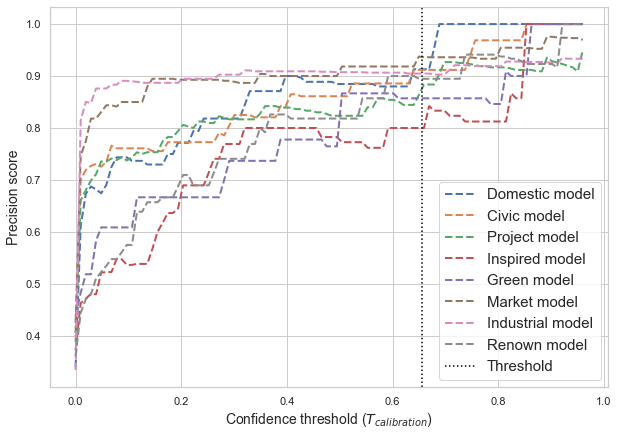

In [12]:
plt.figure(figsize=(10,7))

equalized_precisions_threshold = 0.656

for k in _conventions_matches_precissions:
    x = thresholds
    y = _conventions_matches_precissions[k]
    
    plt.plot(x,y, marker='', linewidth=2, linestyle='dashed', label=k.replace("training_", "").replace(".txt", "")+" model")
    

#plt.title("Comparing precission scores for all classifiers", fontdict={'fontsize':20}, pad=25)
plt.xlabel("Confidence threshold ($T_{calibration}$)", fontsize=14)
plt.ylabel("Precision score", fontsize=14)
plt.axvline(x=equalized_precisions_threshold, color='black', linestyle=":", label="Threshold")

"""plt.legend([x.replace("training_", "").replace(".txt", "")+" model"
            for x in list(_conventions_matches_precissions.keys())], fontsize=15)
"""

plt.legend(fontsize=15)

plt.show()

In [13]:
from sklearn.metrics import accuracy_score, auc, precision_score, roc_curve
import tqdm

In [15]:
def apply_pred_threshold(preds, t):
    res = np.zeros(len(preds))
    
    res[preds>=t] = 1
    return res
    

In [26]:
k = "Green"
model = _DLModels[k]
x_val = _DLData_val_x[k]
y_val = _DLData_val_y[k][:,1]

pred = model.predict(x_val)[:,1]
y_pred = apply_pred_threshold(pred, t_calibration)

roc_auc_score(y_val, y_pred)


0.873015873015873

In [29]:
def train_models_and_get_scores(df, t_calibration, N_executions=1):
    accs = {}
    precs = {}
    AUCs = {}
    for i in tqdm.tqdm(range(N_executions)):
    
        _DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(df,
                    data_class_column="convention", 
                    data_label_column="label",
                    tokenizer=extended_tokenizer,
                    random_seed=0,
                    use_validation=True) 

        for k in _DLModels.keys():
            model = _DLModels[k]
            x_val = _DLData_val_x[k]
            y_val = _DLData_val_y[k][:,1]

            pred = model.predict(x_val)[:,1]
            y_pred = apply_pred_threshold(pred, t_calibration)



            if k in accs:
                accs[k].append(accuracy_score(y_val, y_pred))
                precs[k].append(precision_score(y_val, y_pred))
                AUCs[k].append(roc_auc_score(y_val, y_pred))
            else:
                accs[k] = [accuracy_score(y_val, y_pred)]
                precs[k] = [precision_score(y_val, y_pred)]
                AUCs[k] = [roc_auc_score(y_val, y_pred)]
        
    return accs, precs, AUCs
    

In [30]:
accs, precs, AUCs = train_models_and_get_scores(training_df, equalized_precisions_threshold)


  0%|          | 0/1 [00:00<?, ?it/s]

Found 82691 unique tokens.
----------------------------------------------------------------
            Domestic                  
----------------------------------------------------------------
Shape of data tensor: (534, 32)
Shape of label tensor: (534, 2)

Number of elements from each class in traing and validation set 
[284. 144.]
[70. 36.]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 32, 100)      8269200     input_19[0][0]                   
__________________________________________________________________________________________________
conv1d_73 (Conv1D)              (None, 30, 128)      38528       embedding_19[0][0]               
__________________________________________________________________________________________________
conv1d_74 (Conv1D)              (None, 29, 128)      51328       embedding_19[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 32, 100)      8269200     input_20[0][0]                   
__________________________________________________________________________________________________
conv1d_77 (Conv1D)              (None, 30, 128)      38528       embedding_20[0][0]               
__________________________________________________________________________________________________
conv1d_78 (Conv1D)              (None, 29, 128)      51328       embedding_20[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 32, 100)      8269200     input_21[0][0]                   
__________________________________________________________________________________________________
conv1d_81 (Conv1D)              (None, 30, 128)      38528       embedding_21[0][0]               
__________________________________________________________________________________________________
conv1d_82 (Conv1D)              (None, 29, 128)      51328       embedding_21[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_22 (Embedding)        (None, 32, 100)      8269200     input_22[0][0]                   
__________________________________________________________________________________________________
conv1d_85 (Conv1D)              (None, 30, 128)      38528       embedding_22[0][0]               
__________________________________________________________________________________________________
conv1d_86 (Conv1D)              (None, 29, 128)      51328       embedding_22[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, 32, 100)      8269200     input_23[0][0]                   
__________________________________________________________________________________________________
conv1d_89 (Conv1D)              (None, 30, 128)      38528       embedding_23[0][0]               
__________________________________________________________________________________________________
conv1d_90 (Conv1D)              (None, 29, 128)      51328       embedding_23[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 32, 100)      8269200     input_24[0][0]                   
__________________________________________________________________________________________________
conv1d_93 (Conv1D)              (None, 30, 128)      38528       embedding_24[0][0]               
__________________________________________________________________________________________________
conv1d_94 (Conv1D)              (None, 29, 128)      51328       embedding_24[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 32, 100)      8269200     input_25[0][0]                   
__________________________________________________________________________________________________
conv1d_97 (Conv1D)              (None, 30, 128)      38528       embedding_25[0][0]               
__________________________________________________________________________________________________
conv1d_98 (Conv1D)              (None, 29, 128)      51328       embedding_25[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 32, 100)      8269200     input_26[0][0]                   
__________________________________________________________________________________________________
conv1d_101 (Conv1D)             (None, 30, 128)      38528       embedding_26[0][0]               
__________________________________________________________________________________________________
conv1d_102 (Conv1D)             (None, 29, 128)      51328       embedding_26[0][0]               
_________________________________


100%|██████████| 1/1 [00:58<00:00, 58.57s/it]


In [37]:
print("Models performance on unseen data:\n\n")
custom_ordered_keys = ["Industrial", "Project", "Market", "Inspired", "Civic", "Domestic", "Green", "Renown"]
for k in custom_ordered_keys:
    avg_acc = "%.3f" % np.mean(accs[k])
    avg_auc = "%.3f" % np.mean(AUCs[k])
    avg_prec = "%.3f" % np.mean(precs[k])
    
    print("{} & {}  & {} & {}\\".format(k, avg_acc, avg_prec, avg_auc))
    print("\hline")
  

Models performance on unseen data:


Industrial & 0.914  & 0.930 & 0.886\
\hline
Project & 0.787  & 0.808 & 0.751\
\hline
Market & 0.885  & 0.906 & 0.872\
\hline
Inspired & 0.806  & 0.800 & 0.772\
\hline
Civic & 0.849  & 0.968 & 0.825\
\hline
Domestic & 0.840  & 0.913 & 0.777\
\hline
Green & 0.875  & 0.857 & 0.873\
\hline
Renown & 0.833  & 0.850 & 0.794\
\hline


In [19]:
def compute_confusions(data_filename, models_, training_x, training_y, calibration_threshold=0.656):
    matches = [0] * len(models_.keys())
    
    sentences = training_x[data_filename]
    
    sent_length = len(sentences)
    
    for idx, k in enumerate(models_.keys()):

        pred = models_[k].predict(sentences, verbose=1)
        
        #print(pred)
        
        pred = np.array(pred)
        matches[idx] = (pred[pred[:,1]>calibration_threshold]).sum()
    
        
    return matches, sent_length

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          class_lengths = None):
    
    
    if normalize:
        if class_lengths:
            cm = cm.astype('float') / np.array(class_lengths)[:, np.newaxis]
        else:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass
    #print(cm)
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
        else:
            title = 'Confusion matrix, without normalization \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
            
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    ax.set_ylim(cm.shape[0]-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    
    #thresh = 0.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    #color=cm[i,j])
                    color="white" if cm[i, j] > thresh else "black")
    
    #fig.tight_layout()
    return ax

In [20]:
y_true = []
y_pred = []

conf_matrix = []
class_lengths = []


for idx, k in enumerate(list(_DLModels.keys())):

    print(" -- {}     ".format(k))


    matches, cl_len = compute_confusions(k, _DLModels, _DLData_val_x, _DLData_val_y)
    
    conf_matrix.append(matches)
    
    class_lengths.append(cl_len)
    
conf_matrix = np.array(conf_matrix)

 -- Domestic     
106/106 [==============================] - 0s 111us/step
 -- Civic     
106/106 [==============================] - 0s 118us/step
 -- Project     
183/183 [==============================] - 0s 98us/step
 -- Inspired     
67/67 [==============================] - 0s 149us/step
 -- Green     
32/32 [==============================] - 0s 111us/step
 -- Market     
148/148 [==============================] - 0s 103us/step
 -- Industrial     
347/347 [==============================] - 0s 92us/step
 -- Renown     
72/72 [==============================] - 0s 125us/step


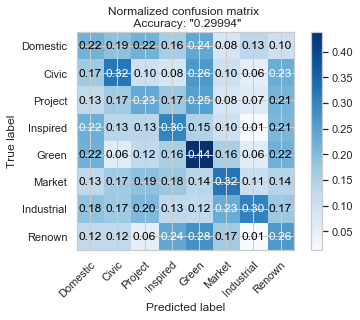

In [21]:
class_names = list(_DLModels.keys())
plot_confusion_matrix(conf_matrix, class_names, normalize=True, class_lengths = class_lengths)